# Portfolio Project Part 4: UFC 

The dataset used in this project provides in fight statistics for every mixed martial arts bout in the Ultimate Fighting Championships (UFC) history since the secound ever event held by the promotion. 
Mixed martial arts allows fighters to use a diverse array of techniques in order to reach victory, more so than other popular combat sports such as boxing, kickboxing, wrestling and jiu jitsu. It is due to this multifaceted nature of the sport that there has been much debate throughout the years regarding which techniques and styles of fighting are the most effective in acquiring victory. In this project I will build predictive models which will aim to predict the winner of each bout through the number of times each technique has been used during the fight by each fighter. Then through the use of recursive feature elimination I will aim to identify which techniques are the best at predicting the outcome of a fight, henceforth finding out which tecniques truly are the most effective in acquiring victory in mixed martial arts.   

DATA SOURCE: https://www.kaggle.com/datasets/rajeevw/ufcdata
(raw_total_fight_data.csv)

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [247]:
In_Fight = pd.read_excel('files/in_fight_data.xlsx')
print(In_Fight.shape)
In_Fight

(6012, 41)


,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,0.39,0.45,41 of 103,23 of 51,...,0 of 0,KO/TKO,3,00:27:00,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,0.47,0.47,43 of 73,75 of 110,...,1 of 2,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,0.77,0.33,14 of 18,2 of 6,...,0 of 0,KO/TKO,1,00:49:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,0.47,0.36,49 of 87,136 of 168,...,0 of 0,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,0.47,0.36,59 of 93,92 of 184,...,2 of 4,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4 of 6,1 of 3,0.66,0.33,20 of 22,9 of 11,...,0 of 2,Submission,1,09:51:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8 of 12,2 of 6,0.66,0.33,11 of 15,2 of 6,...,0 of 0,KO/TKO,1,02:50:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11 of 17,4 of 5,0.64,0.8,74 of 86,95 of 102,...,1 of 1,KO/TKO,1,12:13:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1 of 1,1 of 1,1,1,1 of 1,2 of 2,...,0 of 0,Submission,1,00:58:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


## Data Cleaning

In [248]:
# Get rid of unnecessary variables 
In_Fight.drop(['last_round', 'last_round_time', 'Format', 'Referee', 'location', 'R_TD_pct', 'B_TD_pct', 'Fight_type', 'win_by', 'date', 'R_CTRL', 'B_CTRL'], axis = 1, inplace = True)

In [249]:
# Check for null values
In_Fight.isnull().sum()

R_fighter          0
B_fighter          0
R_KD               0
B_KD               0
R_SIG_STR.         0
B_SIG_STR.         0
R_SIG_STR_pct      0
B_SIG_STR_pct      0
R_TOTAL_STR.       0
B_TOTAL_STR.       0
R_TD               0
B_TD               0
R_SUB_ATT          0
B_SUB_ATT          0
R_REV              0
B_REV              0
R_HEAD             0
B_HEAD             0
R_BODY             0
B_BODY             0
R_LEG              0
B_LEG              0
R_DISTANCE         0
B_DISTANCE         0
R_CLINCH           0
B_CLINCH           0
R_GROUND           0
B_GROUND           0
Winner           110
dtype: int64

In [250]:
# Drop na values as they are all in the winners column which will be dependant variable
In_Fight.dropna(inplace = True)
In_Fight.shape

(5902, 29)

In [251]:
# Percentage of significant strikes landed has some values as '---' as no strikes were thrown at all
# Henceforth they are replaced with 0 percent so they can be used in the predictive models 
In_Fight['R_SIG_STR_pct'].replace('---', '0', inplace=True)
In_Fight['B_SIG_STR_pct'].replace('---', '0', inplace=True)

# Check for any values with '-' in them
In_Fight[In_Fight['R_SIG_STR_pct'].str.contains('-', na=False) | In_Fight['B_SIG_STR_pct'].str.contains('-', na=False)]

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,Winner


## Feature Engineering

Features that contain the the number of strikes and takedowns have both the number of landed and attempted strikes in the same variable. In order to be able use these features in the predictive models the non numeric values must be removed, the two different values must split into two new variables specifying whether it is counting strikes thrown or landed and the original variable must be dropped. This is done below for each of the features that this applies to.

In [252]:
# Split R_SIG_STR into R_SIG_STR_LAN and R_SIG_STR_THR
In_Fight['R_SIG_STR.'] = In_Fight['R_SIG_STR.'].str.replace(' of ', ' ')
df = In_Fight['R_SIG_STR.'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_SIG_STR_LAN', 1: 'R_SIG_STR_THR'}, inplace = True)
In_Fight['R_SIG_STR_LAN'] = df['R_SIG_STR_LAN']
In_Fight['R_SIG_STR_THR'] = df['R_SIG_STR_THR']
In_Fight.drop(['R_SIG_STR.'], axis = 1, inplace = True)

# Split B_SIG_STR into B_SIG_STR_LAN and B_SIG_STR_THR
In_Fight['B_SIG_STR.'] = In_Fight['B_SIG_STR.'].str.replace(' of ', ' ')
df = In_Fight['B_SIG_STR.'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_SIG_STR_LAN', 1: 'B_SIG_STR_THR'}, inplace = True)
In_Fight['B_SIG_STR_LAN'] = df['B_SIG_STR_LAN']
In_Fight['B_SIG_STR_THR'] = df['B_SIG_STR_THR']
In_Fight.drop(['B_SIG_STR.'], axis = 1, inplace = True)

# Split R_TOTAL_STR into R_TOTAL_STR_LAN and R_TOTAL_STR_THR
In_Fight['R_TOTAL_STR.'] = In_Fight['R_TOTAL_STR.'].str.replace(' of ', ' ')
df = In_Fight['R_TOTAL_STR.'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_TOTAL_STR_LAN', 1: 'R_TOTAL_STR_THR'}, inplace = True)
In_Fight['R_TOTAL_STR_LAN'] = df['R_TOTAL_STR_LAN']
In_Fight['R_TOTAL_STR_THR'] = df['R_TOTAL_STR_THR']
In_Fight.drop(['R_TOTAL_STR.'], axis = 1, inplace = True)

# Split B_TOTAL_STR into B_TOTAL_STR_LAN and B_TOTAL_STR_THR
In_Fight['B_TOTAL_STR.'] = In_Fight['B_TOTAL_STR.'].str.replace(' of ', ' ')
df = In_Fight['B_TOTAL_STR.'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_TOTAL_STR_LAN', 1: 'B_TOTAL_STR_THR'}, inplace = True)
In_Fight['B_TOTAL_STR_LAN'] = df['B_TOTAL_STR_LAN']
In_Fight['B_TOTAL_STR_THR'] = df['B_TOTAL_STR_THR']
In_Fight.drop(['B_TOTAL_STR.'], axis = 1, inplace = True)

# Split R_TD into R_TD_LAN and R_TD_THR
In_Fight['R_TD'] = In_Fight['R_TD'].str.replace(' of ', ' ')
df = In_Fight['R_TD'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_TD_LAN', 1: 'R_TD_THR'}, inplace = True)
In_Fight['R_TD_LAN'] = df['R_TD_LAN']
In_Fight['R_TD_THR'] = df['R_TD_THR']
In_Fight.drop(['R_TD'], axis = 1, inplace = True)

# Split B_TD into B_TD_LAN and B_TD_THR
In_Fight['B_TD'] = In_Fight['B_TD'].str.replace(' of ', ' ')
df = In_Fight['B_TD'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_TD_LAN', 1: 'B_TD_THR'}, inplace = True)
In_Fight['B_TD_LAN'] = df['B_TD_LAN']
In_Fight['B_TD_THR'] = df['B_TD_THR']
In_Fight.drop(['B_TD'], axis = 1, inplace = True)

# Split R_HEAD into R_HEAD_LAN and R_HEAD_THR
In_Fight['R_HEAD'] = In_Fight['R_HEAD'].str.replace(' of ', ' ')
df = In_Fight['R_HEAD'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_HEAD_LAN', 1: 'R_HEAD_THR'}, inplace = True)
In_Fight['R_HEAD_LAN'] = df['R_HEAD_LAN']
In_Fight['R_HEAD_THR'] = df['R_HEAD_THR']
In_Fight.drop(['R_HEAD'], axis = 1, inplace = True)

# Split B_HEAD into B_HEAD_LAN and B_HEAD_THR
In_Fight['B_HEAD'] = In_Fight['B_HEAD'].str.replace(' of ', ' ')
df = In_Fight['B_HEAD'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_HEAD_LAN', 1: 'B_HEAD_THR'}, inplace = True)
In_Fight['B_HEAD_LAN'] = df['B_HEAD_LAN']
In_Fight['B_HEAD_THR'] = df['B_HEAD_THR']
In_Fight.drop(['B_HEAD'], axis = 1, inplace = True)

# Split R_BODY into R_BODY_LAN and R_BODY_THR
In_Fight['R_BODY'] = In_Fight['R_BODY'].str.replace(' of ', ' ')
df = In_Fight['R_BODY'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_BODY_LAN', 1: 'R_BODY_THR'}, inplace = True)
In_Fight['R_BODY_LAN'] = df['R_BODY_LAN']
In_Fight['R_BODY_THR'] = df['R_BODY_THR']
In_Fight.drop(['R_BODY'], axis = 1, inplace = True)

# Split B_BODY into B_BODY_LAN and B_BODY_THR
In_Fight['B_BODY'] = In_Fight['B_BODY'].str.replace(' of ', ' ')
df = In_Fight['B_BODY'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_BODY_LAN', 1: 'B_BODY_THR'}, inplace = True)
In_Fight['B_BODY_LAN'] = df['B_BODY_LAN']
In_Fight['B_BODY_THR'] = df['B_BODY_THR']
In_Fight.drop(['B_BODY'], axis = 1, inplace = True)

# Split R_LEG into R_LEG_LAN and R_LEG_THR
In_Fight['R_LEG'] = In_Fight['R_LEG'].str.replace(' of ', ' ')
df = In_Fight['R_LEG'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_LEG_LAN', 1: 'R_LEG_THR'}, inplace = True)
In_Fight['R_LEG_LAN'] = df['R_LEG_LAN']
In_Fight['R_LEG_THR'] = df['R_LEG_THR']
In_Fight.drop(['R_LEG'], axis = 1, inplace = True)

# Split B_LEG into B_LEG_LAN and B_LEG_THR
In_Fight['B_LEG'] = In_Fight['B_LEG'].str.replace(' of ', ' ')
df = In_Fight['B_LEG'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_LEG_LAN', 1: 'B_LEG_THR'}, inplace = True)
In_Fight['B_LEG_LAN'] = df['B_LEG_LAN']
In_Fight['B_LEG_THR'] = df['B_LEG_THR']
In_Fight.drop(['B_LEG'], axis = 1, inplace = True)

# Split R_DISTANCE into R_DISTANCE_LAN and R_DISTANCE_THR
In_Fight['R_DISTANCE'] = In_Fight['R_DISTANCE'].str.replace(' of ', ' ')
df = In_Fight['R_DISTANCE'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_DISTANCE_LAN', 1: 'R_DISTANCE_THR'}, inplace = True)
In_Fight['R_DISTANCE_LAN'] = df['R_DISTANCE_LAN']
In_Fight['R_DISTANCE_THR'] = df['R_DISTANCE_THR']
In_Fight.drop(['R_DISTANCE'], axis = 1, inplace = True)

# Split B_DISTANCE into B_DISTANCE_LAN and B_DISTANCE_THR
In_Fight['B_DISTANCE'] = In_Fight['B_DISTANCE'].str.replace(' of ', ' ')
df = In_Fight['B_DISTANCE'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_DISTANCE_LAN', 1: 'B_DISTANCE_THR'}, inplace = True)
In_Fight['B_DISTANCE_LAN'] = df['B_DISTANCE_LAN']
In_Fight['B_DISTANCE_THR'] = df['B_DISTANCE_THR']
In_Fight.drop(['B_DISTANCE'], axis = 1, inplace = True)

# Split R_CLINCH into R_CLINCH_LAN and R_CLINCH_THR
In_Fight['R_CLINCH'] = In_Fight['R_CLINCH'].str.replace(' of ', ' ')
df = In_Fight['R_CLINCH'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_CLINCH_LAN', 1: 'R_CLINCH_THR'}, inplace = True)
In_Fight['R_CLINCH_LAN'] = df['R_CLINCH_LAN']
In_Fight['R_CLINCH_THR'] = df['R_CLINCH_THR']
In_Fight.drop(['R_CLINCH'], axis = 1, inplace = True)

# Split B_CLINCH into B_CLINCH_LAN and B_CLINCH_THR
In_Fight['B_CLINCH'] = In_Fight['B_CLINCH'].str.replace(' of ', ' ')
df = In_Fight['B_CLINCH'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_CLINCH_LAN', 1: 'B_CLINCH_THR'}, inplace = True)
In_Fight['B_CLINCH_LAN'] = df['B_CLINCH_LAN']
In_Fight['B_CLINCH_THR'] = df['B_CLINCH_THR']
In_Fight.drop(['B_CLINCH'], axis = 1, inplace = True)

# Split R_GROUND into R_GROUND_LAN and R_GROUND_THR
In_Fight['R_GROUND'] = In_Fight['R_GROUND'].str.replace(' of ', ' ')
df = In_Fight['R_GROUND'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'R_GROUND_LAN', 1: 'R_GROUND_THR'}, inplace = True)
In_Fight['R_GROUND_LAN'] = df['R_GROUND_LAN']
In_Fight['R_GROUND_THR'] = df['R_GROUND_THR']
In_Fight.drop(['R_GROUND'], axis = 1, inplace = True)

# Split B_GROUND into B_GROUND_LAN and B_GROUND_THR
In_Fight['B_GROUND'] = In_Fight['B_GROUND'].str.replace(' of ', ' ')
df = In_Fight['B_GROUND'].str.split(' ',n = 2,expand = True)
df.rename(columns={0: 'B_GROUND_LAN', 1: 'B_GROUND_THR'}, inplace = True)
In_Fight['B_GROUND_LAN'] = df['B_GROUND_LAN']
In_Fight['B_GROUND_THR'] = df['B_GROUND_THR']
In_Fight.drop(['B_GROUND'], axis = 1, inplace = True)

In_Fight

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,...,B_DISTANCE_LAN,B_DISTANCE_THR,R_CLINCH_LAN,R_CLINCH_THR,B_CLINCH_LAN,B_CLINCH_THR,R_GROUND_LAN,R_GROUND_THR,B_GROUND_LAN,B_GROUND_THR
0,Adrian Yanez,Gustavo Lopez,2,0,0.39,0.45,0,0,0,0,...,23,51,0,0,0,0,0,1,0,0
1,Trevin Giles,Roman Dolidze,0,0,0.47,0.47,1,2,0,1,...,28,59,4,5,3,6,8,10,1,2
2,Tai Tuivasa,Harry Hunsucker,1,0,0.77,0.33,0,0,0,0,...,2,6,0,0,0,0,5,8,0,0
3,Cheyanne Buys,Montserrat Conejo,0,0,0.47,0.36,0,2,3,1,...,15,41,2,2,0,0,3,7,0,0
4,Marion Reneau,Macy Chiasson,0,0,0.47,0.36,0,0,0,1,...,36,119,5,9,13,15,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,0.66,0.33,1,0,0,0,...,1,1,0,0,0,0,4,5,0,2
6008,Orlando Wiet,Robert Lucarelli,0,0,0.66,0.33,0,1,0,0,...,2,6,0,0,0,0,7,9,0,0
6009,Johnny Rhodes,David Levicki,0,0,0.64,0.8,0,0,0,0,...,1,2,1,1,2,2,9,15,1,1
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0


The model will attempt to predict the winner of each fight through variables that are specific to the corner of each fighter (red or blue). Hence forth a variable must be created that specifies whether the fighter in the red corner won or not. If not than it can be assumed that the blue corner fighter won the fight. This variable is created below.

In [253]:
# Create a function that identifies whether the winner is from the red or blue corner.
# The function will return 1 for red winning and 0 if blue wins.
def winner(R_fighter, B_fighter, Winner):
    if Winner == R_fighter:
        return(1)
    if Winner == B_fighter:
        return(0)

# Apply the function winner to the dataset and put the output into a new variable 'R_Won'.
In_Fight['R_Won'] = In_Fight.apply(lambda x: winner(x['R_fighter'], x['B_fighter'], x['Winner']), axis = 1) 
In_Fight

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,...,B_DISTANCE_THR,R_CLINCH_LAN,R_CLINCH_THR,B_CLINCH_LAN,B_CLINCH_THR,R_GROUND_LAN,R_GROUND_THR,B_GROUND_LAN,B_GROUND_THR,R_Won
0,Adrian Yanez,Gustavo Lopez,2,0,0.39,0.45,0,0,0,0,...,51,0,0,0,0,0,1,0,0,1
1,Trevin Giles,Roman Dolidze,0,0,0.47,0.47,1,2,0,1,...,59,4,5,3,6,8,10,1,2,1
2,Tai Tuivasa,Harry Hunsucker,1,0,0.77,0.33,0,0,0,0,...,6,0,0,0,0,5,8,0,0,1
3,Cheyanne Buys,Montserrat Conejo,0,0,0.47,0.36,0,2,3,1,...,41,2,2,0,0,3,7,0,0,0
4,Marion Reneau,Macy Chiasson,0,0,0.47,0.36,0,0,0,1,...,119,5,9,13,15,0,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,0.66,0.33,1,0,0,0,...,1,0,0,0,0,4,5,0,2,1
6008,Orlando Wiet,Robert Lucarelli,0,0,0.66,0.33,0,1,0,0,...,6,0,0,0,0,7,9,0,0,1
6009,Johnny Rhodes,David Levicki,0,0,0.64,0.8,0,0,0,0,...,2,1,1,2,2,9,15,1,1,1
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1


In [254]:
# Get rid of unnecessary variables. 
In_Fight.drop(['R_fighter', 'B_fighter', 'Winner'], axis = 1, inplace = True)

In [255]:
# Change all features to numeric data type.
In_Fight = In_Fight.apply(pd.to_numeric, errors='ignore')

In [256]:
In_Fight.dtypes

R_KD                 int64
B_KD                 int64
R_SIG_STR_pct      float64
B_SIG_STR_pct      float64
R_SUB_ATT            int64
B_SUB_ATT            int64
R_REV                int64
B_REV                int64
R_SIG_STR_LAN        int64
R_SIG_STR_THR        int64
B_SIG_STR_LAN        int64
B_SIG_STR_THR        int64
R_TOTAL_STR_LAN      int64
R_TOTAL_STR_THR      int64
B_TOTAL_STR_LAN      int64
B_TOTAL_STR_THR      int64
R_TD_LAN             int64
R_TD_THR             int64
B_TD_LAN             int64
B_TD_THR             int64
R_HEAD_LAN           int64
R_HEAD_THR           int64
B_HEAD_LAN           int64
B_HEAD_THR           int64
R_BODY_LAN           int64
R_BODY_THR           int64
B_BODY_LAN           int64
B_BODY_THR           int64
R_LEG_LAN            int64
R_LEG_THR            int64
B_LEG_LAN            int64
B_LEG_THR            int64
R_DISTANCE_LAN       int64
R_DISTANCE_THR       int64
B_DISTANCE_LAN       int64
B_DISTANCE_THR       int64
R_CLINCH_LAN         int64
R

## Exploratory Data Analysis

In [257]:
# Number of wins for each corner.
In_Fight.groupby(['R_Won'])['R_Won'].count()\
.reset_index(name='count') \
.sort_values(['count'], ascending=False)

,R_Won,count
1,1,3979
0,0,1923


In [258]:
# Percentage of wins for each corner.
In_Fight['R_Won'].value_counts(normalize=True)\
.reset_index(name='Percentage Of Wins') \
.sort_values(['Percentage Of Wins'], ascending=False)

,index,Percentage Of Wins
0,1,0.674178
1,0,0.325822


Text(0, 0.5, 'Number Of Wins')

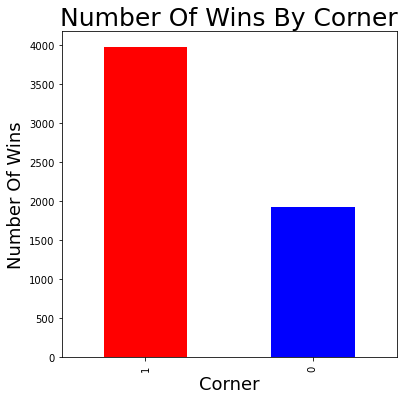

In [259]:
# Number of wins for each corner visualized.
plt.figure(figsize = (6,6))
In_Fight['R_Won'].value_counts().plot(kind='bar', color = ['red', 'blue'])
plt.title('Number Of Wins By Corner', size = 25)
plt.xlabel('Corner', size = 18)
plt.ylabel('Number Of Wins', size = 18)

As shown by the visualisation there is a significant amount of both red and bue corner winners with the red corner winning approximatly 33% more of the fights. The table which the displays the percentage of wins per columns shows that the red corner wins 67.4178% of the fights. Henceforth the model accuracy score needs to be significantly higher than 67.4178% in order to be considered accurate.

## Data Preprocessing

In [260]:
# Split the data into training(80%) and testing data (20%) and use random_state=142.
train, test = train_test_split(In_Fight, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(4721, 45)
(1181, 45)


In [261]:
# Include the required features for each data set that will be used in the model.
X_train = train.drop(['R_Won'], axis=1)
y_train = train['R_Won']
X_test = test.drop(['R_Won'], axis=1)
y_test = test['R_Won']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4721, 44)
y_train shape:  (4721,)
X_test shape:  (1181, 44)
y_test shape:  (1181,)


## KNN

In [262]:
# Instansiate and fit the Knn model to the training data sets.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [263]:
# Use the model to make a prediction using both the X_train and X_test data sets.
y_hat_train_knn = knn.predict(X_train)
y_hat_test_knn = knn.predict(X_test)

In [264]:
# Evaluate the performance of the trained model.
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train_knn))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test_knn))

Accuracy score on training set:  0.8640118618936666
Accuracy score on testing set:  0.817104149026249


In [265]:
# Cross validation score
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77566138 0.81991525 0.79661017 0.8220339  0.79025424]
0.8008949869966819


The Knn model performs similarly on both the training and the testing datasets. Both predictions and the cross validation score are significantly higher than the proportion of values where red won, indicating that the model has been fairly succesful in predicting the winner. 

## KNN Model Tuning

In [266]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [267]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : range(1, 135, 5),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
KNN
Best Score: 0.8222865662272442
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 51, 'p': 1, 'weights': 'distance'}


The model tuning only improved the cross validation score by 2%. Lets try a logistic regression model and see if that model is more accurate.

## Logistic Regression

In [268]:
# Instansiate and fit the Logistic Regression model to the training data sets.
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [269]:
# Use the model to make a prediction using both the X_train and X_test data sets.
y_hat_train_lr= lr.predict(X_train)
y_hat_test_lr = lr.predict(X_test)

In [270]:
# Evaluate the performance of the trained model.
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train_lr))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test_lr))

Accuracy score on training set:  0.8796865070959542
Accuracy score on testing set:  0.8848433530906011


In [271]:
# Cross validation score.
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.86031746 0.875      0.8940678  0.88665254 0.88665254]
0.8805380683346785


The accuracy scores and the cross validation scores are much better than the knn model. Henceforth I will use logistic regression to preform Recursive Feature Selection.

## Logistic Regression with RFE

In [272]:
# Accuaracy score for model for each number of features.
acc_scores = []
for i in range(1,44):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.7027942421676545
Acc on test set using 2 features:  0.745977984758679
Acc on test set using 3 features:  0.7569856054191363
Acc on test set using 4 features:  0.7832345469940728
Acc on test set using 5 features:  0.777307366638442
Acc on test set using 6 features:  0.7874682472480948
Acc on test set using 7 features:  0.7790008467400508
Acc on test set using 8 features:  0.8035563082133785
Acc on test set using 9 features:  0.8331922099915327
Acc on test set using 10 features:  0.8467400508044031
Acc on test set using 11 features:  0.8450465707027942
Acc on test set using 12 features:  0.8492802709568162
Acc on test set using 13 features:  0.8552074513124471
Acc on test set using 14 features:  0.8552074513124471
Acc on test set using 15 features:  0.8509737510584251
Acc on test set using 16 features:  0.8933107535986452
Acc on test set using 17 features:  0.890770533446232
Acc on test set using 18 features:  0.8941574936494496
Acc on test set using 

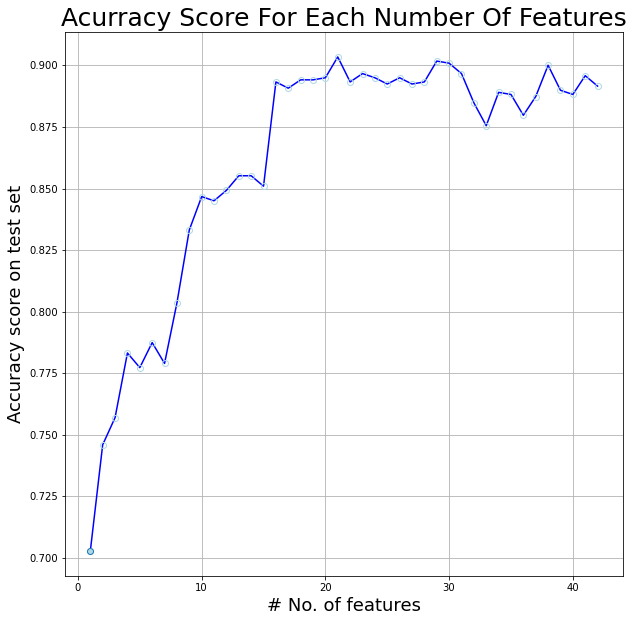

In [273]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 43):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.figure(figsize = (10,10))
plt.grid()   
plt.title('Acurracy Score For Each Number Of Features', size = 25)
plt.xlabel('# No. of features', size = 18)
plt.ylabel('Accuracy score on test set', size = 18)
plt.plot(range(1, 43), acc_scores, marker = 'o', color = 'blue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

The optimal number of features to use is 21.

In [274]:
# Creating RFE object for Logistic regression model with optimal number of features.
lr = LogisticRegression()
rfe2 = RFE(estimator=lr, n_features_to_select=21, step=1)
rfe2.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=21)

In [275]:
# Summarize all features.
for i in range(X_train.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe2.support_[i], rfe2.ranking_[i]))

Column: R_KD, Selected True, Rank: 1.000
Column: B_KD, Selected True, Rank: 1.000
Column: R_SIG_STR_pct, Selected True, Rank: 1.000
Column: B_SIG_STR_pct, Selected True, Rank: 1.000
Column: R_SUB_ATT, Selected True, Rank: 1.000
Column: B_SUB_ATT, Selected True, Rank: 1.000
Column: R_REV, Selected True, Rank: 1.000
Column: B_REV, Selected True, Rank: 1.000
Column: R_SIG_STR_LAN, Selected False, Rank: 8.000
Column: R_SIG_STR_THR, Selected True, Rank: 1.000
Column: B_SIG_STR_LAN, Selected True, Rank: 1.000
Column: B_SIG_STR_THR, Selected True, Rank: 1.000
Column: R_TOTAL_STR_LAN, Selected False, Rank: 17.000
Column: R_TOTAL_STR_THR, Selected False, Rank: 23.000
Column: B_TOTAL_STR_LAN, Selected True, Rank: 1.000
Column: B_TOTAL_STR_THR, Selected True, Rank: 1.000
Column: R_TD_LAN, Selected True, Rank: 1.000
Column: R_TD_THR, Selected True, Rank: 1.000
Column: B_TD_LAN, Selected True, Rank: 1.000
Column: B_TD_THR, Selected False, Rank: 9.000
Column: R_HEAD_LAN, Selected False, Rank: 16.000

In [276]:
# Features that are used in the model
for i in range(X_train.shape[1]):
   if rfe2.ranking_[i] == 1:
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe2.support_[i], rfe2.ranking_[i]))

Column: R_KD, Selected True, Rank: 1.000
Column: B_KD, Selected True, Rank: 1.000
Column: R_SIG_STR_pct, Selected True, Rank: 1.000
Column: B_SIG_STR_pct, Selected True, Rank: 1.000
Column: R_SUB_ATT, Selected True, Rank: 1.000
Column: B_SUB_ATT, Selected True, Rank: 1.000
Column: R_REV, Selected True, Rank: 1.000
Column: B_REV, Selected True, Rank: 1.000
Column: R_SIG_STR_THR, Selected True, Rank: 1.000
Column: B_SIG_STR_LAN, Selected True, Rank: 1.000
Column: B_SIG_STR_THR, Selected True, Rank: 1.000
Column: B_TOTAL_STR_LAN, Selected True, Rank: 1.000
Column: B_TOTAL_STR_THR, Selected True, Rank: 1.000
Column: R_TD_LAN, Selected True, Rank: 1.000
Column: R_TD_THR, Selected True, Rank: 1.000
Column: B_TD_LAN, Selected True, Rank: 1.000
Column: R_DISTANCE_LAN, Selected True, Rank: 1.000
Column: R_DISTANCE_THR, Selected True, Rank: 1.000
Column: R_GROUND_LAN, Selected True, Rank: 1.000
Column: B_GROUND_LAN, Selected True, Rank: 1.000
Column: B_GROUND_THR, Selected True, Rank: 1.000


In [277]:
# Evaluating accuaracy for model with optimal number of features.
y_train_hat = rfe2.predict(X_train)
y_test_hat = rfe2.predict(X_test)
print("accuracy score on train set: ", accuracy_score(y_train, y_train_hat))
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on train set:  0.8871001906375768
accuracy score on test set:  0.903471634208298


In [278]:
# Cross validation score with optimal amount of features.
cv = cross_val_score(rfe2,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.87089947 0.8845339  0.89194915 0.89088983 0.88983051]
0.885620572145996


The RFE only slightly raises the accuracy and cross validation scores.

## Conclusion

In conclusion the in fight statistics are effective in predicting the outcome of a mixed martial arts fights. A logistic regression model that has undergone recursive feature elimination returns an accuracy score of 90.3471634208298% on the testing set and a cross validation score of 88.5620572145996%.

Through observation of the most effective features it can be shown that grappling is extremely important as statistics observing landed and attempted ground strikes, take downs, submissions and reversals are included in the model. The number of landed and attempted significant strikes are also included however the types of strikes such as head, body and leg are not included indicating that variety in strikes is not as important as quantity.